In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd  


In [3]:
data=pd.read_csv('housingdata.csv')
data.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [6]:
housing_colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = housing_colnames
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [5]:
data.shape

(505, 14)

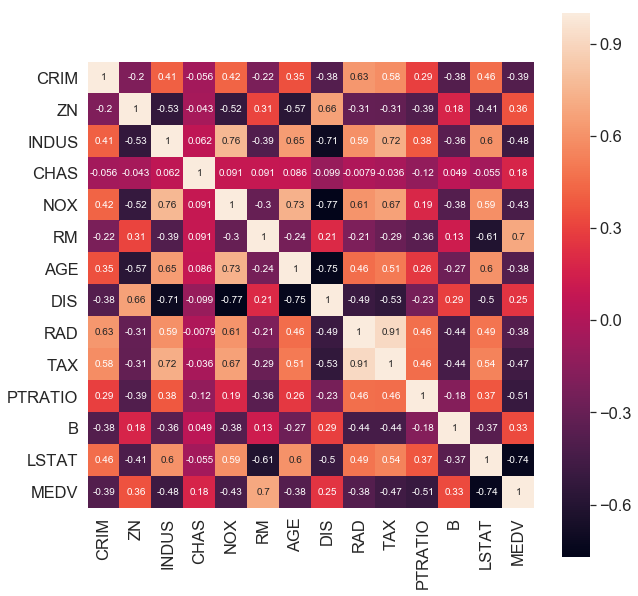

In [50]:
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [51]:
x=data['RM'].values
y=data['MEDV'].values

In [52]:
print(x.size)
print(y.size)

505
505


In [53]:
train_x,test_x=x[:int((x.size)*.75)],x[int((x.size)*.75)+1:]
train_y,test_y=y[:int((y.size)*.75)],y[int((y.size)*.75)+1:]

In [62]:
def finding_co(x, y): 
    total_size = x.size 
    
    mean_x, mean_y = np.mean(x), np.mean(y) 
  
    A = np.sum(y*x) - total_size*mean_y*mean_x 
    B = np.sum(x**2) - total_size*mean_x**2 
  
    first = A / B 
    second = mean_y - first*mean_x 
    
    #print(B0)
    return(second, first) 


In [69]:
def draw_line(x, y, b): 
    
    plt.scatter(x, y, color = "r", marker = "o", s = 30) 
   
    y_pred = b[0] + b[1]*x 
  
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('Avarage no of rooms') 
    plt.ylabel('Price') 
    plt.show() 

In [72]:
b = finding_co(train_x, train_y)

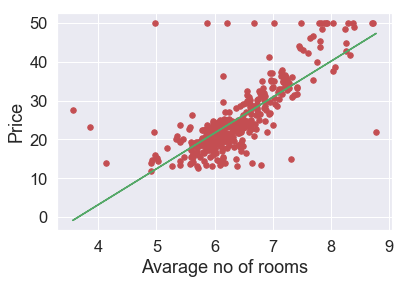

In [73]:
draw_line(train_x, train_y, b)

In [74]:
def pridect(x,b):
    predicted_value = b[0] + b[1]*x
    return predicted_value

In [75]:
predicted_value=pridect(test_x,b)

In [76]:
mean_error=abs((predicted_value.mean())-test_y.mean())

In [77]:
mean_error

6.839506224807787